In [1]:
%cd ..

d:\Repositories\other\nbody


In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from barnes_hut.BHTree import Tracker, Body

plt.style.use('dark_background')
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.rcParams['animation.embed_limit'] = 2**128
plt.ioff()

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "d:\Repositories\other\nbody\.conda\python.exe"
  * The NumPy version is: "1.24.4"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: No module named 'numpy.core._multiarray_umath'


In [ ]:
def animate_bodies(_bodies, _size, _dt=1000, _N=100, F=200):
    _m = list(map(lambda x: x.get_mass(), _bodies))

    _T = Tracker(_bodies, _size, dt=_dt)

    _fig = plt.figure()
    _axes = plt.axes(xlim=(-_size, _size), ylim=(-_size, _size))
    _data = _T.get_all()
    _pic = _axes.scatter(x=_data.real, y=_data.imag, c=_m)
    plt.axis('off')
    plt.show()

    def _init():
        return _pic,

    def _animate(i):
        _T.update(N=_N)
        _pic.set_offsets(_T.get_all_pairs())
        return _pic,

    return animation.FuncAnimation(_fig, _animate, init_func=_init, frames=F, interval=1, blit=True)

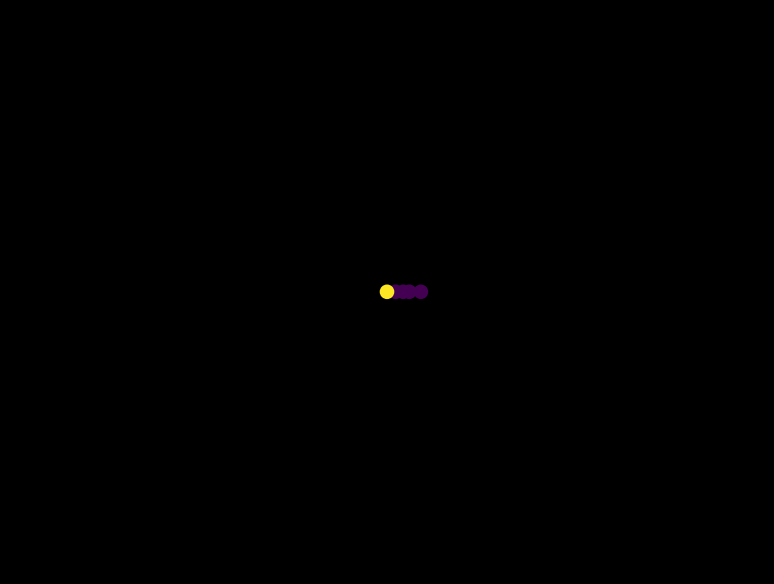

In [ ]:
SIZE = np.float64(2.5e12)
BODIES = [Body(1.4960e+11 + 0j,  0 + 2.9800e+04j,  5.9740e+24),
          Body(2.2790e+11 + 0j, 0 + 2.4100e+04j, 6.4190e+23),
          Body(5.7900e+10 + 0j, 0 + 4.7900e+04j, 3.3020e+23),
          Body(0, 0, 1.9890e+30),
          Body(1.0820e+11, 3.5000e+04j, 4.8690e+24)]
MASS = list(map(lambda x: x.get_mass(), BODIES))

T = Tracker(BODIES, SIZE, dt=1000)

animate_bodies(BODIES, SIZE, _N=10, F=10)

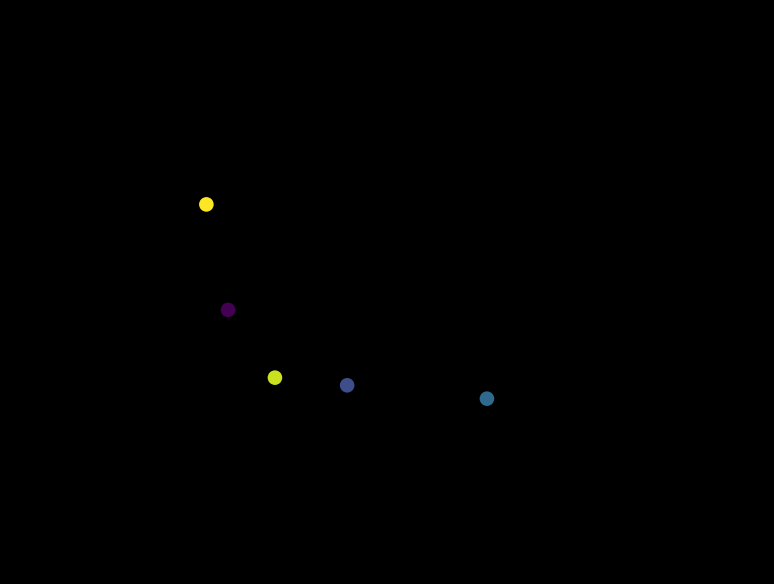

: 

: 

In [ ]:
MAX_V = 5e5
MAX_M = 1e24
rng = np.random.default_rng(122807528840384100672348137672332424406)

def rnd_c(LIM):
    return LIM * (rng.random() - 0.5 + 1j * rng.random() - 0.5j)

b = [Body(rnd_c(SIZE), rnd_c(MAX_V), rng.random() * MAX_M) for i in range(5)]

animate_bodies(b, SIZE, _N=50, F=200)